## 3.4 텐서플로를 사용한 예측모형과 최적화

이 절의 내용을 실행하려면 텐서플로우 2.0 버전을 임포트해야 한다.

In [1]:
# 코랩에서는 다음 코드로 베타버전을 설치한다.
# !pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

### 예측 모형

함수의 입력과 출력 데이터가 훈련데이터로 주어졌을 때 이 훈련데이터의 특성을 최대한 비슷하게 따라할 수 있는 함수가 바로 예측모형이다.  예를 들어 다음과 같은 함수가 있다고 하자.

$$
f(x;w) = wx
$$

$x=5$일 때 이 함수의 값이 $50$에 가까워지는 $w$값을 찾으면 다음과 같은 훈련 데이터에 대한 예측모형을 만든 것이다.

$$
x=5 \rightarrow f(x)=50
$$


### 손실함수

예측모형을 만드는 방법은 함수의 출력과 훈련 데이터의 목표값이 일치할 수록 값이 작아지는 손실함수를 정의하고 그 손실함수를 최소화하는 최적화를 실행하는 것이다. 예를 들어 위와 같은 예측문제에서 손실함수는 다음처럼 정의할 수 있다.

$$
\text{loss} = (f(5;w) - 50)^2
$$

### 최적화

텐서플로를 사용하여 최적화를 하는 방법은 다음과 같다.

1. 변수를 정의한다.
2. 그래디언트를 구한다.
3. 그래디언트를 사용하여 변수값을 업데이트 한다. 예를 들어 Steepest Gradient 방법을 사용한다면 다음과 같은 수식을 적용하는 것과 같다. 변수 이름은 $w$라고 가정한다.
$$ w_{k+1} = w_k - \mu \cdot g $$
4. 2,3번을 반복한다. 보통 2,3번을 묶어서 하나의 함수로 만든다.

다음으로 손실함수의 그레디언트를 구하고 변수를 업데이트하는 코드를 `train_step`이라는 하나의 함수로 만든다. 

In [2]:
x = tf.Variable(tf.constant(5.0))  # x = 5
w = tf.Variable(tf.constant(0.0))  # w의 초깃값

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        y = tf.multiply(w, x)
        loss = tf.square(tf.subtract(y, 50))

    gradient = tape.gradient(loss, w)
    mu = 0.01
    w.assign_sub(mu * gradient)

이 `train_step()` 함수를 반복하면 손실함수를 최소화하는 a값을 구할 수 있다. a값이 10으로 수렴하는 것을 볼 수 있다.

In [3]:
for i in range(10):
    train_step()
    print("{:1}:{:4.3}".format(i, w.numpy()))

0: 5.0
1: 7.5
2:8.75
3:9.38
4:9.69
5:9.84
6:9.92
7:9.96
8:9.98
9:9.99


### 최적화 객체

텐서플로의 keras.optimizers 서브패키지는 다양한 최적화 객체를 제공한다. 

* `Adadelta`: Adadelta algorithm.
* `Adagrad`: Adagrad algorithm.
* `Adam`: Adam algorithm.
* `Adamax`: Adamax algorithm.
* `Ftrl`: FTRL algorithm.
* `Nadam`: NAdam algorithm.
* `RMSprop`: RMSprop algorithm.
* `SGD`: Stochastic gradient descent and momentum optimizer.


이 최적화 객체를 사용하면 여러가지 다양한 최적화 방법을 쉽게 사용할 수 있다. 최적화 객체가 있을 대는 `apply_gradients()` 메서드로 변수값을 업데이트 할 수 있다. `apply_gradients()` 메서드는 그레디언트와 해당 변수의 튜플의 리스트를 인수로 받는다.

최적화 객체를 사용하면 위 코드는 다음처럼 바뀐다.

In [4]:
from tensorflow import keras

optimizer = keras.optimizers.SGD()

x = tf.Variable(tf.constant(5.0))  # x = 5
w = tf.Variable(tf.constant(0.0))  # w의 초깃값

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        y = tf.multiply(w, x)
        loss = tf.square(tf.subtract(y, 50))

    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    
for i in range(10):
    train_step()
    print("{:1}:{:4.3}".format(i, w.numpy()))

0: 5.0
1: 7.5
2:8.75
3:9.38
4:9.69
5:9.84
6:9.92
7:9.96
8:9.98
9:9.99


### 복수의 변수가 있는 경우

이번에는 $x=5$일 때 $wx+b$의 값이 $50$에 가까워지는 $a,b$값을 찾자. 

$$
f(x;w,b) = wx + b
$$

$$
x=5 \rightarrow f(x)=50
$$

손실함수는 동일하다.

In [5]:
x = tf.Variable(tf.constant(5.0))  # x = 5
w = tf.Variable(tf.constant(1.0))  # w의 초깃값
b = tf.Variable(tf.constant(1.0))  # b의 초깃값

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        y = tf.add(tf.multiply(x, w), b)
        loss = tf.square(tf.subtract(y, 50))

    variables = [w, b]
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return loss


for i in range(15):
    loss = train_step()
    print("{:2}:w={:6.5f}, b={:6.5f}, loss={:10.5f}".format(i, w.numpy(), b.numpy(), loss.numpy()))

 0:w=5.40000, b=1.88000, loss=1936.00000
 1:w=7.51200, b=2.30240, loss= 446.05444
 2:w=8.52576, b=2.50515, loss= 102.77094
 3:w=9.01236, b=2.60247, loss=  23.67841
 4:w=9.24593, b=2.64919, loss=   5.45552
 5:w=9.35805, b=2.67161, loss=   1.25695
 6:w=9.41186, b=2.68237, loss=   0.28960
 7:w=9.43769, b=2.68754, loss=   0.06672
 8:w=9.45009, b=2.69002, loss=   0.01537
 9:w=9.45605, b=2.69121, loss=   0.00354
10:w=9.45890, b=2.69178, loss=   0.00082
11:w=9.46027, b=2.69205, loss=   0.00019
12:w=9.46093, b=2.69219, loss=   0.00004
13:w=9.46125, b=2.69225, loss=   0.00001
14:w=9.46140, b=2.69228, loss=   0.00000


### 선형회귀 모형

이번에는 복수의 데이터가 있는 간단한 선형회귀모형을 계산해보자. 이 코드에서는 몇가지를 수정하였다.

1. 예측값을 구하는 코드를 별도의 모형함수로 분리하였다.
2. 데이터가 미리 준비되지 않은 경우를 대비하여 모형함수와 훈련함수는 데이터를 인수로 받는다.
3. 훈련에 의해 변화하는 값을 기록하였다.

In [6]:
# 가중치 변수
w = tf.Variable(tf.random.normal((2, 1)))

@tf.function
def model_predict(X):
    return tf.matmul(X, w)
    
@tf.function
def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))

    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss


# 정답인 가중치 벡터
w0 = tf.constant([[3.0], [5.0]])

# 입력 데이터 행렬
X = tf.concat([tf.ones((10, 1)), tf.random.normal((10, 1))], 1)

# 목표값 벡터
y_target = tf.matmul(X, w0) + tf.random.normal((10, 1))

losses = []
w_0s = []
w_1s = []
for i in range(20):
    loss_value = train_step(X, y_target)
    losses.append(loss_value)
    
    w_0 = w.numpy()[0][0]
    w_1 = w.numpy()[1][0]
    w_0s.append(w_0)
    w_1s.append(w_1)
    
    print(f"[{i:02d}] loss: {loss_value:7.3f}, w_0: {w_0:3.2f}, w_1: {w_1:3.2f}")

[00] loss: 273.237, w_0: 0.11, w_1: 1.07
[01] loss: 182.641, w_0: 0.63, w_1: 1.69
[02] loss: 122.701, w_0: 1.05, w_1: 2.20
[03] loss:  83.006, w_0: 1.39, w_1: 2.62
[04] loss:  56.695, w_0: 1.66, w_1: 2.97
[05] loss:  39.239, w_0: 1.87, w_1: 3.25
[06] loss:  27.647, w_0: 2.04, w_1: 3.49
[07] loss:  19.943, w_0: 2.18, w_1: 3.68
[08] loss:  14.818, w_0: 2.29, w_1: 3.84
[09] loss:  11.406, w_0: 2.38, w_1: 3.98
[10] loss:   9.132, w_0: 2.45, w_1: 4.09
[11] loss:   7.616, w_0: 2.50, w_1: 4.18
[12] loss:   6.603, w_0: 2.55, w_1: 4.25
[13] loss:   5.927, w_0: 2.58, w_1: 4.31
[14] loss:   5.475, w_0: 2.61, w_1: 4.36
[15] loss:   5.173, w_0: 2.63, w_1: 4.40
[16] loss:   4.970, w_0: 2.65, w_1: 4.44
[17] loss:   4.835, w_0: 2.66, w_1: 4.46
[18] loss:   4.744, w_0: 2.68, w_1: 4.49
[19] loss:   4.683, w_0: 2.69, w_1: 4.51


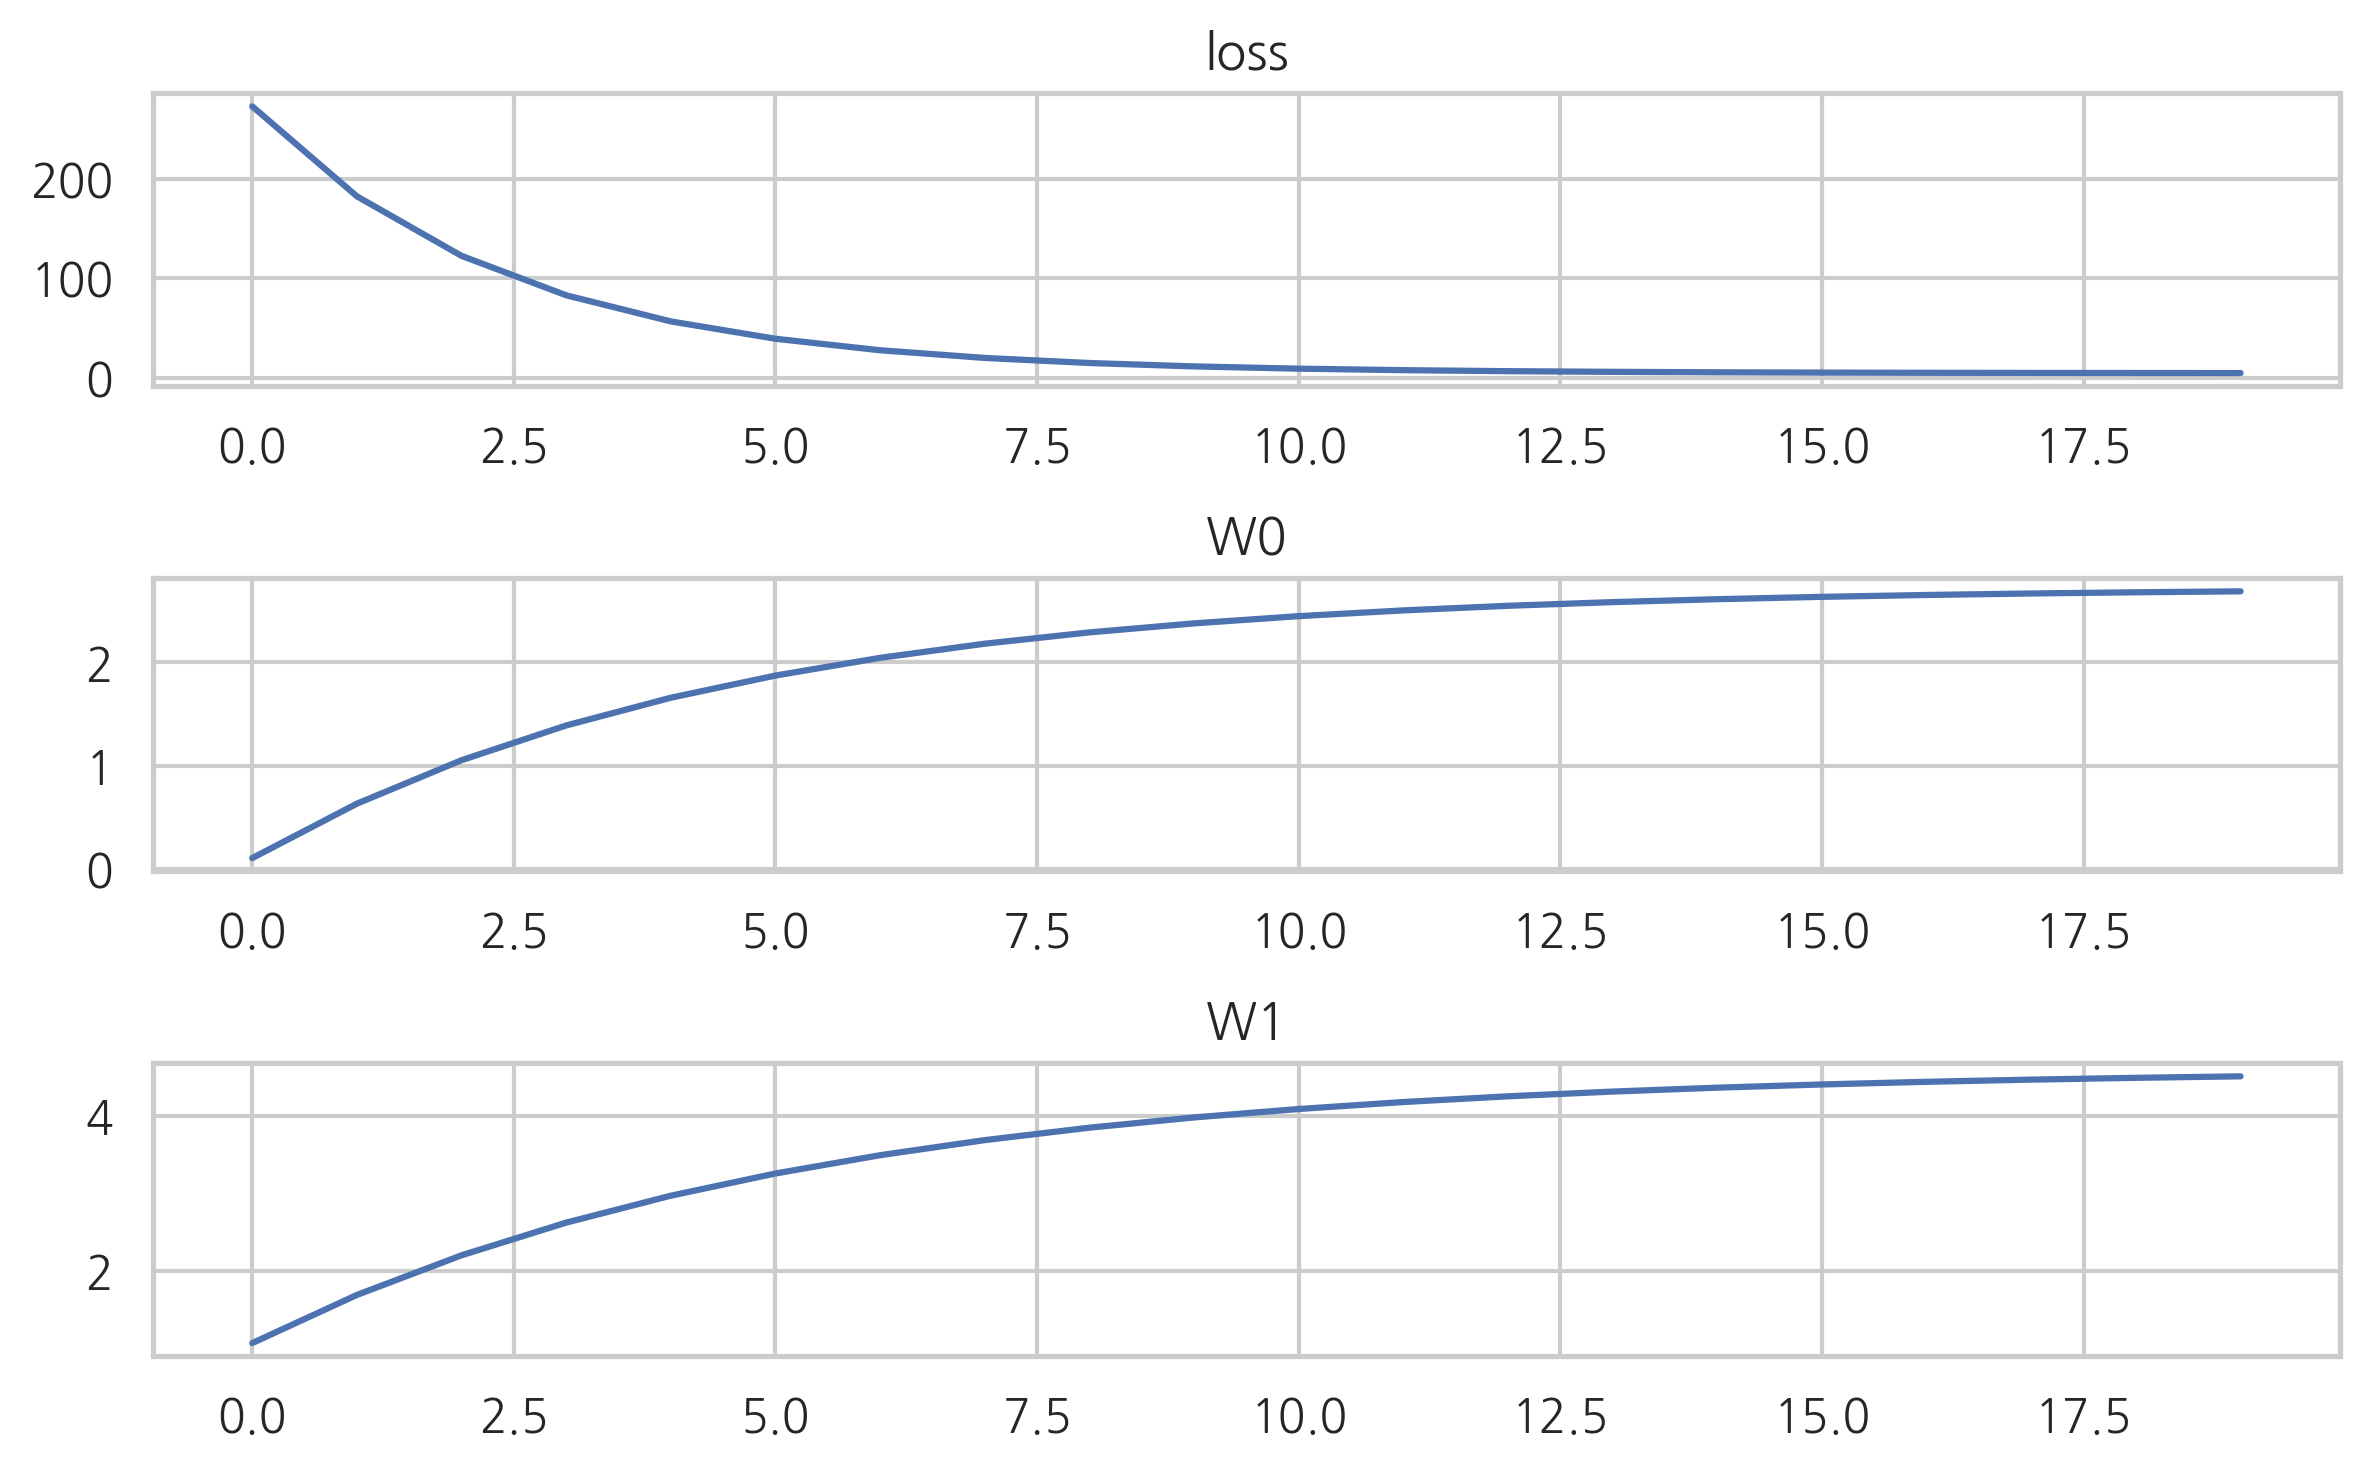

In [7]:
plt.subplot(311)
plt.plot(losses)
plt.title("loss")
plt.subplot(312)
plt.plot(w_0s)
plt.title("W0")
plt.subplot(313)
plt.plot(w_1s)
plt.title("W1")
plt.tight_layout()
plt.show()

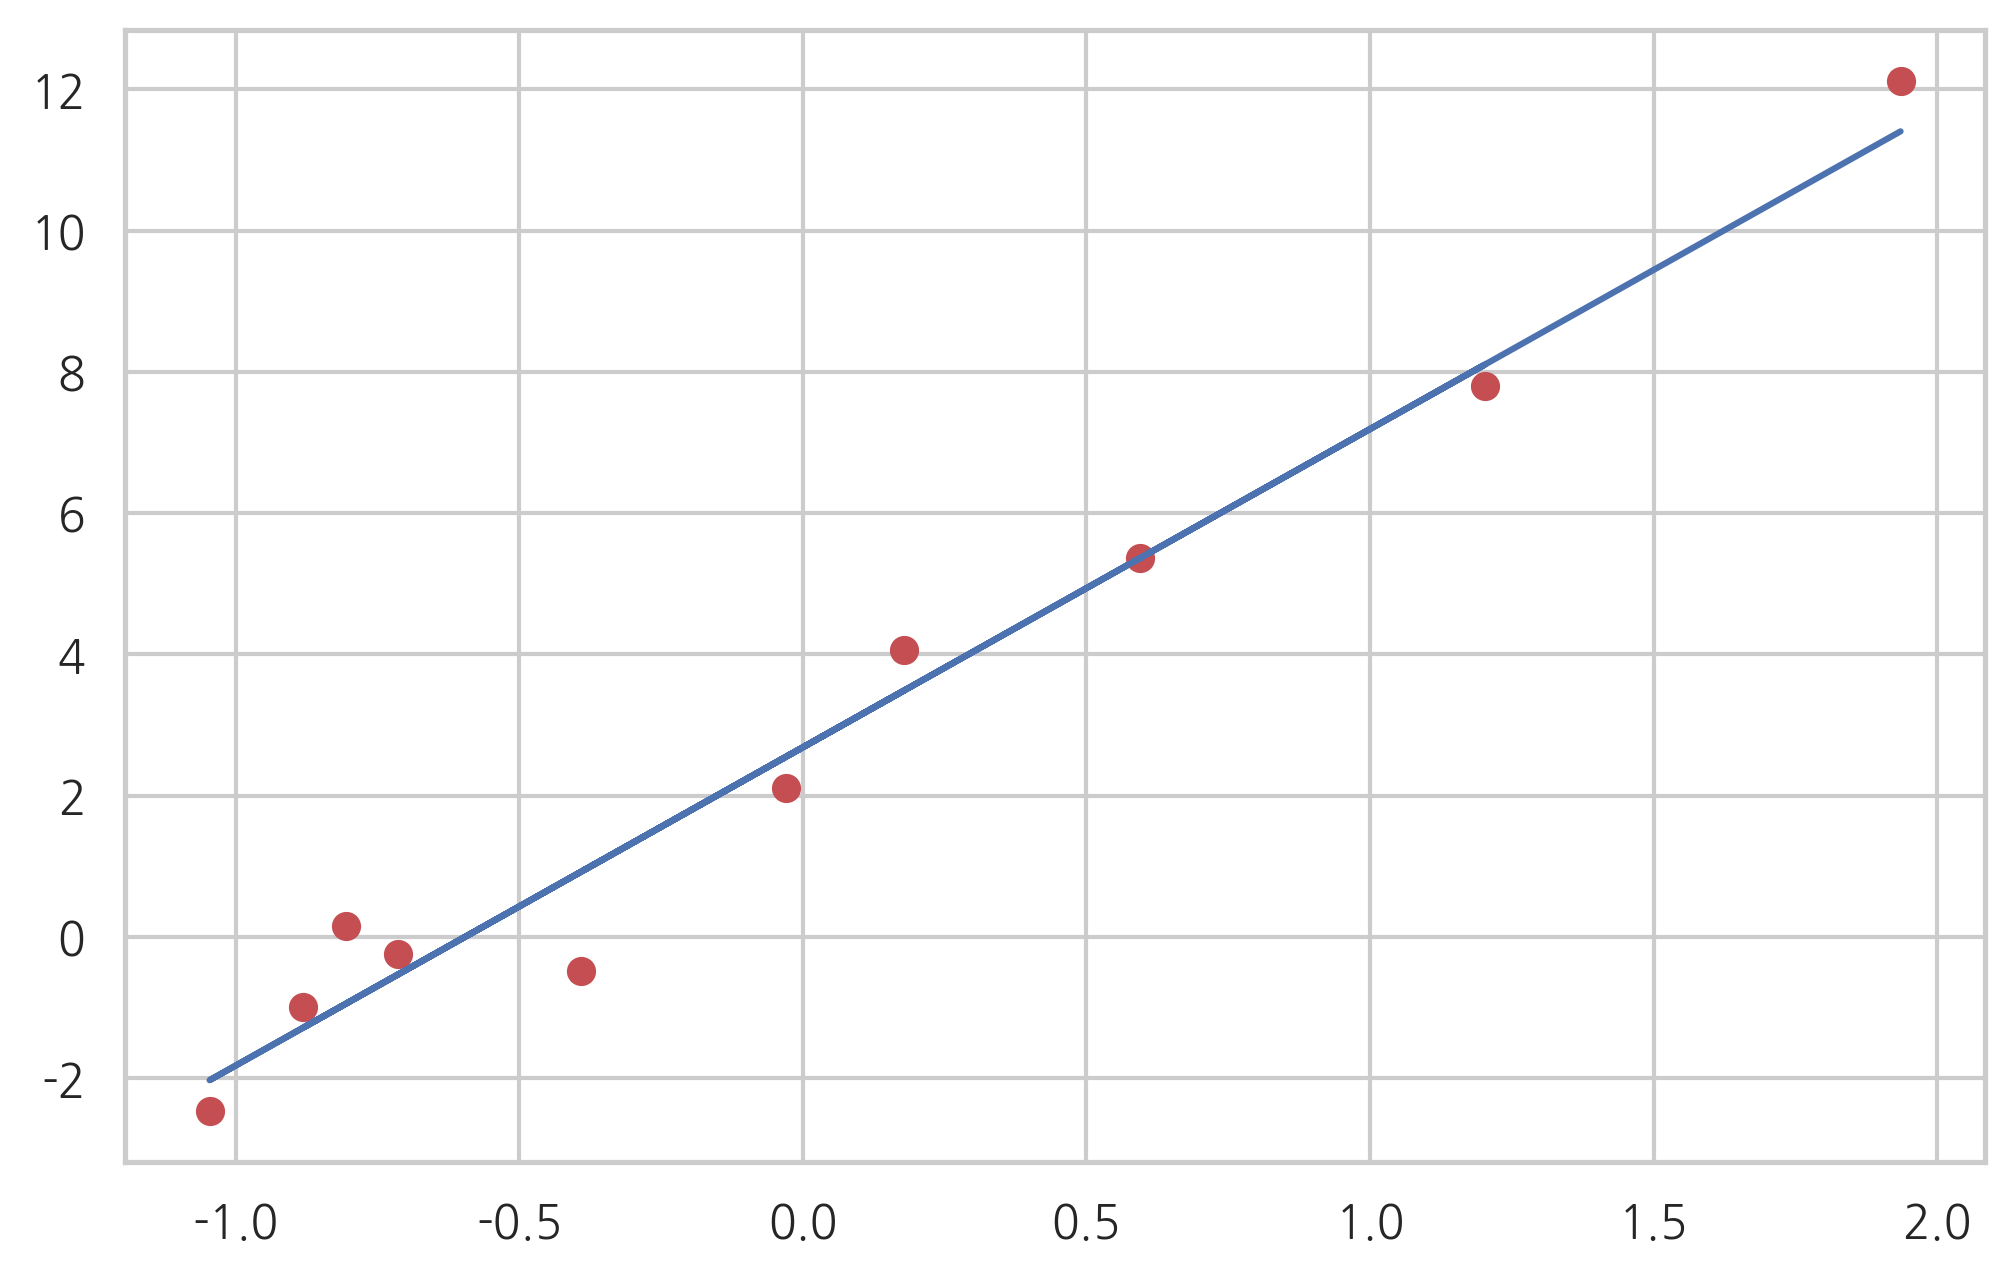

In [8]:
y_predict = tf.matmul(X, w)

plt.plot(X[:, 1], y_target, "ro")
plt.plot(X[:, 1], y_predict, "b-")
plt.show()

### 보스턴 주택가격 예측

지금까지 배운 개념을 이용해 보스턴 주택가격을 예측하는 선형회귀모형을 구현해 보자.

[00000] loss: 299626.344
[10000] loss:  24514.988
[20000] loss:  22555.945
[30000] loss:  21518.232
[40000] loss:  20740.951
[50000] loss:  20077.875
[60000] loss:  19483.068
[70000] loss:  18939.609
[80000] loss:  18439.666
[90000] loss:  17978.490


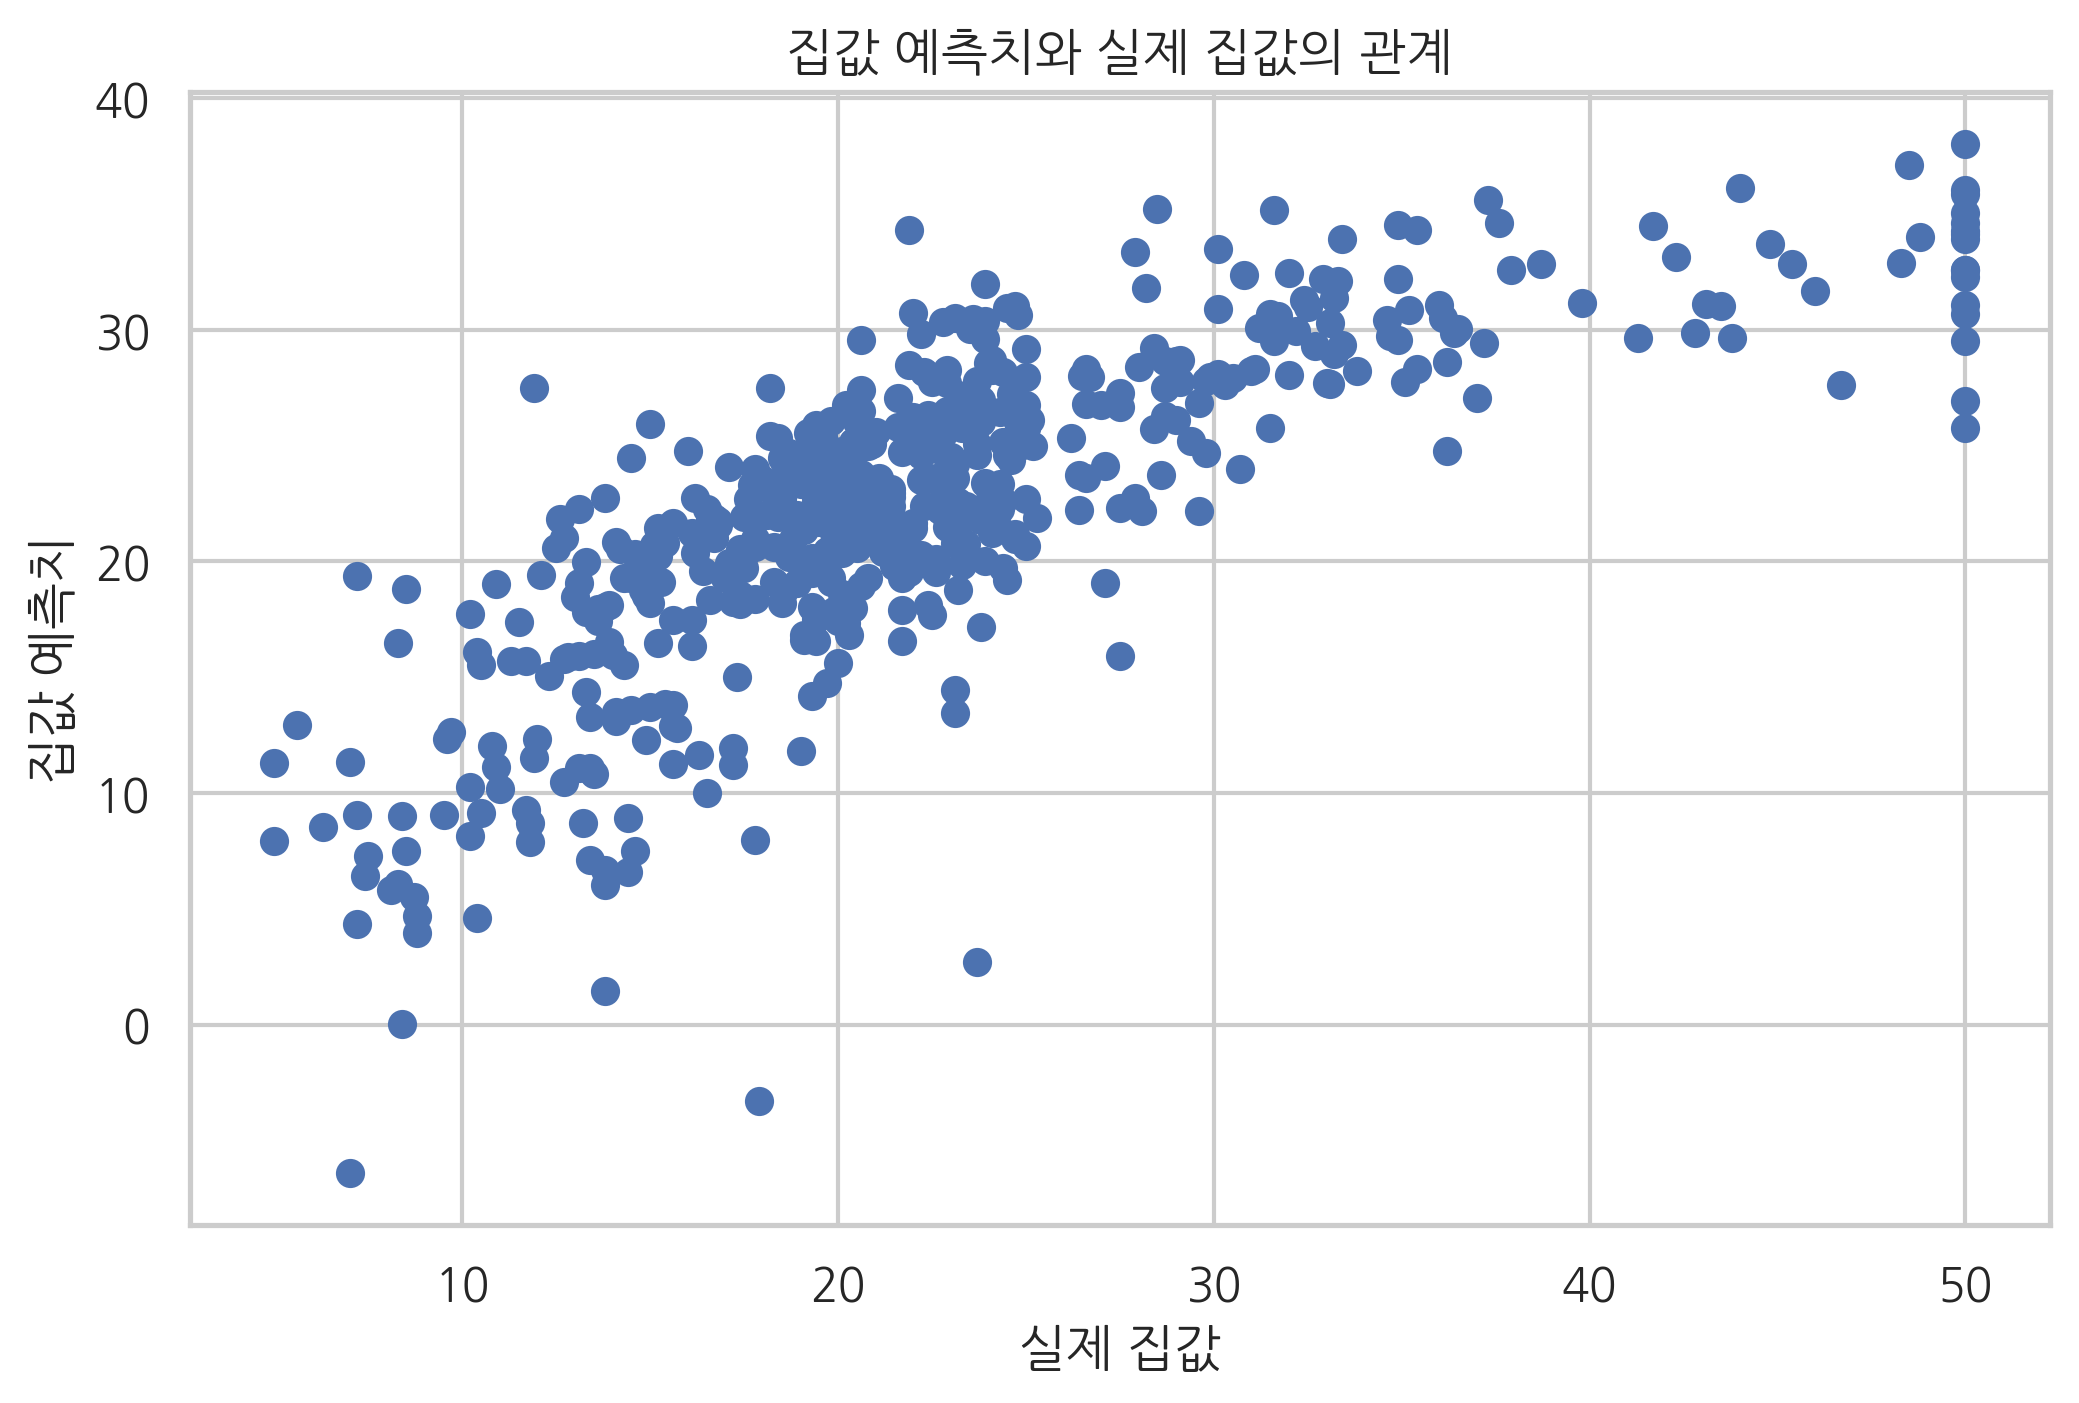

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['const'] = np.ones(df.shape[0])
# 자료형을 float로 통일
X = tf.constant(df.values, dtype=tf.float32)
y_target = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32)

# 가중치 변수
w = tf.Variable(tf.zeros((X.shape[1], 1)))

@tf.function
def model_predict(X):
    return tf.matmul(X, w)

optimizer = keras.optimizers.SGD(learning_rate=6e-9)

@tf.function
def train_step(X, y_target):
    with tf.GradientTape() as tape:
        y_predict = model_predict(X)
        loss = tf.reduce_sum(tf.square(y_target - y_predict))

    gradient = tape.gradient(loss, w)
    optimizer.apply_gradients([(gradient, w)])
    return loss

for i in range(100000):
    loss_value = train_step(X, y_target)
    if (i % 10000 == 0):
        print(f"[{i:05d}] loss: {loss_value:10.3f}")

predictions = model_predict(X)
plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()